<a href="https://colab.research.google.com/github/Felipepa9/MADSI/blob/main/Seccion_2_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

IMPORTACIÓN DEL DATASET

In [3]:
data = pd.read_csv('/content/drive/MyDrive/MOD. Y SIST. INTELIGENTES/Seccion_2.csv')
data.head()

,origin_leg_airport_iata_code,destination_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,BOG,MIA,A320,480,6679,463,3
1,BOG,MIA,A320,384,6707,618,3
2,BOG,MIA,A320,288,6922,938,3
3,BOG,MIA,A320,480,7456,1079,3
4,BOG,MIA,A320,480,7604,549,3


PREPARACIÓN DE LOS DATOS

In [4]:
data.describe()

,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
count,6141.000000,6141.000000,6141.000000,6141.000000
mean,594.869728,24883.396027,1199.942843,2.140205
std,168.563712,13183.490634,1246.855397,0.509883
min,200.000000,6679.000000,0.000000,1.000000
25%,475.000000,15373.000000,0.000000,2.000000
50%,560.000000,16923.000000,1045.000000,2.000000
75%,800.000000,41491.000000,1831.000000,2.000000
max,1200.000000,58901.000000,28994.000000,3.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   origin_leg_airport_iata_code       6141 non-null   object
 1   destination_leg_airport_iata_code  6141 non-null   object
 2   business_type                      6141 non-null   object
 3   taxi_fuel_kg_qty                   6141 non-null   int64 
 4   trip_fuel_kg_qty                   6141 non-null   int64 
 5   extra_fuel_kg_qty                  6141 non-null   int64 
 6   fuel_profitability                 6141 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 336.0+ KB


In [6]:
data.loc[data['origin_leg_airport_iata_code'] == 'BOG', 'origin_leg_airport_iata_code'] = 1
data.loc[data['origin_leg_airport_iata_code'] == 'LIM', 'origin_leg_airport_iata_code'] = 2
data.loc[data['origin_leg_airport_iata_code'] == 'SCL', 'origin_leg_airport_iata_code'] = 3

data['origin_leg_airport_iata_code'] = pd.to_numeric(data['origin_leg_airport_iata_code'], errors='coerce').astype('Int64')

data.head()

,origin_leg_airport_iata_code,destination_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,1,MIA,A320,480,6679,463,3
1,1,MIA,A320,384,6707,618,3
2,1,MIA,A320,288,6922,938,3
3,1,MIA,A320,480,7456,1079,3
4,1,MIA,A320,480,7604,549,3


In [7]:
data = data.drop('destination_leg_airport_iata_code', axis=1)
data.head()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,1,A320,480,6679,463,3
1,1,A320,384,6707,618,3
2,1,A320,288,6922,938,3
3,1,A320,480,7456,1079,3
4,1,A320,480,7604,549,3


In [8]:
data['business_type'] = data['business_type'].astype(str).str.replace('A', '', regex=False).str.replace('B', '', regex=False)
data['business_type'] = pd.to_numeric(data['business_type'], errors='coerce').astype('Int64')

data.head()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
0,1,320,480,6679,463,3
1,1,320,384,6707,618,3
2,1,320,288,6922,938,3
3,1,320,480,7456,1079,3
4,1,320,480,7604,549,3


RECONOCIMIENTO DEL DATASET



In [9]:
data.describe()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability
count,6141.0,6141.0,6141.000000,6141.000000,6141.000000,6141.000000
mean,1.784237,699.587852,594.869728,24883.396027,1199.942843,2.140205
std,0.863776,160.826931,168.563712,13183.490634,1246.855397,0.509883
min,1.0,320.0,200.000000,6679.000000,0.000000,1.000000
25%,1.0,763.0,475.000000,15373.000000,0.000000,2.000000
50%,1.0,763.0,560.000000,16923.000000,1045.000000,2.000000
75%,3.0,763.0,800.000000,41491.000000,1831.000000,2.000000
max,3.0,789.0,1200.000000,58901.000000,28994.000000,3.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6141 entries, 0 to 6140
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   origin_leg_airport_iata_code  6141 non-null   Int64
 1   business_type                 6141 non-null   Int64
 2   taxi_fuel_kg_qty              6141 non-null   int64
 3   trip_fuel_kg_qty              6141 non-null   int64
 4   extra_fuel_kg_qty             6141 non-null   int64
 5   fuel_profitability            6141 non-null   int64
dtypes: Int64(2), int64(4)
memory usage: 300.0 KB


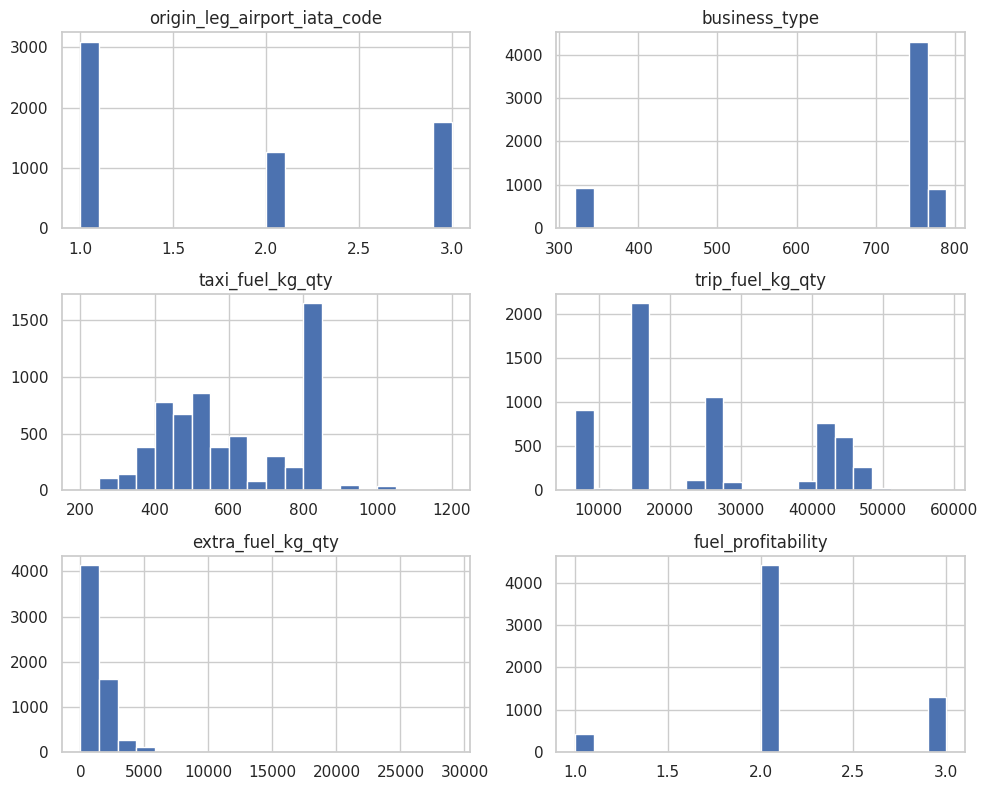

In [11]:
data.hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

FORMULACIÓN DEL MODELO

In [12]:
feature_names = data.columns[:5].tolist()
feature_names

['origin_leg_airport_iata_code',
 'business_type',
 'taxi_fuel_kg_qty',
 'trip_fuel_kg_qty',
 'extra_fuel_kg_qty']

In [13]:
data['TIPO_RENTAB'] = data['fuel_profitability'].map({
        1: 'baja',
        2: 'media',
        3: 'alta'
    })

data.head()

,origin_leg_airport_iata_code,business_type,taxi_fuel_kg_qty,trip_fuel_kg_qty,extra_fuel_kg_qty,fuel_profitability,TIPO_RENTAB
0,1,320,480,6679,463,3,alta
1,1,320,384,6707,618,3,alta
2,1,320,288,6922,938,3,alta
3,1,320,480,7456,1079,3,alta
4,1,320,480,7604,549,3,alta


In [14]:
    X = data[feature_names]
    y = data['fuel_profitability']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

    print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras.")
    print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras.")
    print(f"\nDimensiones: X_train: {X_train.shape}, y_train: {y_train.shape}, X_test: {X_test.shape}, y_test: {y_test.shape}")

Tamaño del conjunto de entrenamiento: 4912 muestras.
Tamaño del conjunto de prueba: 1229 muestras.

Dimensiones: X_train: (4912, 5), y_train: (4912,), X_test: (1229, 5), y_test: (1229,)


In [15]:
    num_features = X_train.shape[1]

    num_classes = len(y_train.unique())

    y_train_encoded = to_categorical(y_train - 1, num_classes=num_classes)
    y_test_encoded = to_categorical(y_test - 1, num_classes=num_classes)

    l2_lambda=0.004
    dropout_rate=0.3

    model = Sequential([
        Dense(128, activation='relu', input_shape=(num_features,), kernel_regularizer=regularizers.l2(l2_lambda)),

        Dropout(dropout_rate),
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)),

        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])

    from tensorflow.keras.optimizers import Adam

    optimizer = Adam(learning_rate=0.0001)

    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    print("\nResumen del modelo:")
    model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Resumen del modelo:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,219 (36.01 KB)

 Trainable params: 9,219 (36.01 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5379 - loss: 1064.2338
Epoch 1: val_loss improved from inf to 78.52424, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5383 - loss: 1037.1019 - val_accuracy: 0.7325 - val_loss: 78.5242 - learning_rate: 0.0010
Epoch 2/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5444 - loss: 127.3214
Epoch 2: val_loss improved from 78.52424 to 1.12444, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5450 - loss: 124.4911 - val_accuracy: 0.7314 - val_loss: 1.1244 - learning_rate: 0.0010
Epoch 3/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6286 - loss: 17.2627
Epoch 3: val_loss did not improve from 1.12444
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6301 - loss: 16.8630 - val_accuracy: 0.7253 - val_loss: 1.1246 - learning_rate: 0.0010
Epoch 4/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6995 - loss: 7.2613
Epoch 4: val_loss improved from 1.12444 to 1.05938, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6993 - loss: 7.1442 - val_accuracy: 0.7253 - val_loss: 1.0594 - learning_rate: 0.0010
Epoch 5/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7005 - loss: 3.5107
Epoch 5: val_loss improved from 1.05938 to 1.01586, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7009 - loss: 3.4743 - val_accuracy: 0.7253 - val_loss: 1.0159 - learning_rate: 0.0010
Epoch 6/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7143 - loss: 1.8950
Epoch 6: val_loss improved from 1.01586 to 0.98767, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7142 - loss: 1.8983 - val_accuracy: 0.7253 - val_loss: 0.9877 - learning_rate: 0.0010
Epoch 7/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7182 - loss: 1.6070
Epoch 7: val_loss improved from 0.98767 to 0.97085, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7181 - loss: 1.6086 - val_accuracy: 0.7253 - val_loss: 0.9709 - learning_rate: 0.0010
Epoch 8/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7163 - loss: 1.5855
Epoch 8: val_loss improved from 0.97085 to 0.95931, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7164 - loss: 1.5721 - val_accuracy: 0.7253 - val_loss: 0.9593 - learning_rate: 0.0010
Epoch 9/500
111/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7221 - loss: 1.2408
Epoch 9: val_loss improved from 0.95931 to 0.95176, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7217 - loss: 1.2455 - val_accuracy: 0.7253 - val_loss: 0.9518 - learning_rate: 0.0010
Epoch 10/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7200 - loss: 1.1161
Epoch 10: val_loss improved from 0.95176 to 0.94691, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7199 - loss: 1.1114 - val_accuracy: 0.7253 - val_loss: 0.9469 - learning_rate: 0.0010
Epoch 11/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7208 - loss: 1.0959
Epoch 11: val_loss improved from 0.94691 to 0.94355, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7207 - loss: 1.0926 - val_accuracy: 0.7253 - val_loss: 0.9436 - learning_rate: 0.0010
Epoch 12/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7190 - loss: 1.3428
Epoch 12: val_loss improved from 0.94355 to 0.94136, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7190 - loss: 1.3396 - val_accuracy: 0.7253 - val_loss: 0.9414 - learning_rate: 0.0010
Epoch 13/500
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7214 - loss: 0.9847
Epoch 13: val_loss improved from 0.94136 to 0.93994, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7212 - loss: 0.9846 - val_accuracy: 0.7253 - val_loss: 0.9399 - learning_rate: 0.0010
Epoch 14/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7205 - loss: 1.0511
Epoch 14: val_loss improved from 0.93994 to 0.93904, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7204 - loss: 1.0520 - val_accuracy: 0.7253 - val_loss: 0.9390 - learning_rate: 0.0010
Epoch 15/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7211 - loss: 1.1299
Epoch 15: val_loss improved from 0.93904 to 0.93861, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7211 - loss: 1.1295 - val_accuracy: 0.7253 - val_loss: 0.9386 - learning_rate: 0.0010
Epoch 16/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7206 - loss: 1.0491
Epoch 16: val_loss improved from 0.93861 to 0.93826, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7205 - loss: 1.0477 - val_accuracy: 0.7253 - val_loss: 0.9383 - learning_rate: 0.0010
Epoch 17/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7187 - loss: 0.9696
Epoch 17: val_loss improved from 0.93826 to 0.93801, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7187 - loss: 0.9690 - val_accuracy: 0.7253 - val_loss: 0.9380 - learning_rate: 0.0010
Epoch 18/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7166 - loss: 1.0216
Epoch 18: val_loss did not improve from 0.93801
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7166 - loss: 1.0223 - val_accuracy: 0.7253 - val_loss: 0.9381 - learning_rate: 0.0010
Epoch 19/500
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7198 - loss: 0.9378
Epoch 19: val_loss improved from 0.93801 to 0.93783, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7198 - loss: 0.9374 - val_accuracy: 0.7253 - val_loss: 0.9378 - learning_rate: 0.0010
Epoch 20/500
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7203 - loss: 0.9364
Epoch 20: val_loss improved from 0.93783 to 0.93763, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7202 - loss: 0.9367 - val_accuracy: 0.7253 - val_loss: 0.9376 - learning_rate: 0.0010
Epoch 21/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7206 - loss: 0.9387
Epoch 21: val_loss improved from 0.93763 to 0.93745, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7205 - loss: 0.9388 - val_accuracy: 0.7253 - val_loss: 0.9374 - learning_rate: 0.0010
Epoch 22/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7202 - loss: 0.9359
Epoch 22: val_loss improved from 0.93745 to 0.93739, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7201 - loss: 0.9366 - val_accuracy: 0.7253 - val_loss: 0.9374 - learning_rate: 0.0010
Epoch 23/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7198 - loss: 0.9739
Epoch 23: val_loss improved from 0.93739 to 0.93734, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7198 - loss: 0.9723 - val_accuracy: 0.7253 - val_loss: 0.9373 - learning_rate: 0.0010
Epoch 24/500
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7196 - loss: 0.9537
Epoch 24: val_loss improved from 0.93734 to 0.93705, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7196 - loss: 0.9531 - val_accuracy: 0.7253 - val_loss: 0.9371 - learning_rate: 0.0010
Epoch 25/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7203 - loss: 0.9591
Epoch 25: val_loss improved from 0.93705 to 0.93678, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7203 - loss: 0.9599 - val_accuracy: 0.7253 - val_loss: 0.9368 - learning_rate: 0.0010
Epoch 26/500
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7213 - loss: 1.0667
Epoch 26: val_loss improved from 0.93678 to 0.93666, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7212 - loss: 1.0569 - val_accuracy: 0.7253 - val_loss: 0.9367 - learning_rate: 0.0010
Epoch 27/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7210 - loss: 0.9918
Epoch 27: val_loss improved from 0.93666 to 0.93639, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7210 - loss: 0.9934 - val_accuracy: 0.7253 - val_loss: 0.9364 - learning_rate: 0.0010
Epoch 28/500
109/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7210 - loss: 0.9318
Epoch 28: val_loss improved from 0.93639 to 0.93599, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7209 - loss: 0.9311 - val_accuracy: 0.7253 - val_loss: 0.9360 - learning_rate: 0.0010
Epoch 29/500
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7181 - loss: 0.9356
Epoch 29: val_loss improved from 0.93599 to 0.93541, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7182 - loss: 0.9358 - val_accuracy: 0.7253 - val_loss: 0.9354 - learning_rate: 0.0010
Epoch 30/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7200 - loss: 0.9450
Epoch 30: val_loss improved from 0.93541 to 0.93497, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7200 - loss: 0.9451 - val_accuracy: 0.7253 - val_loss: 0.9350 - learning_rate: 0.0010
Epoch 31/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7206 - loss: 0.9603
Epoch 31: val_loss did not improve from 0.93497
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.9607 - val_accuracy: 0.7253 - val_loss: 0.9351 - learning_rate: 0.0010
Epoch 32/500
106/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7212 - loss: 0.9306
Epoch 32: val_loss improved from 0.93497 to 0.93468, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7212 - loss: 0.9298 - val_accuracy: 0.7253 - val_loss: 0.9347 - learning_rate: 0.0010
Epoch 33/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.9304
Epoch 33: val_loss improved from 0.93468 to 0.93410, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7207 - loss: 0.9303 - val_accuracy: 0.7253 - val_loss: 0.9341 - learning_rate: 0.0010
Epoch 34/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7183 - loss: 0.9551
Epoch 34: val_loss improved from 0.93410 to 0.93363, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7183 - loss: 0.9545 - val_accuracy: 0.7253 - val_loss: 0.9336 - learning_rate: 0.0010
Epoch 35/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7205 - loss: 0.9852
Epoch 35: val_loss improved from 0.93363 to 0.93320, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7205 - loss: 0.9850 - val_accuracy: 0.7253 - val_loss: 0.9332 - learning_rate: 0.0010
Epoch 36/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7204 - loss: 0.9288
Epoch 36: val_loss improved from 0.93320 to 0.93255, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7204 - loss: 0.9287 - val_accuracy: 0.7253 - val_loss: 0.9326 - learning_rate: 0.0010
Epoch 37/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7203 - loss: 0.9718
Epoch 37: val_loss improved from 0.93255 to 0.93225, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7203 - loss: 0.9714 - val_accuracy: 0.7253 - val_loss: 0.9323 - learning_rate: 0.0010
Epoch 38/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7204 - loss: 0.9461
Epoch 38: val_loss improved from 0.93225 to 0.93168, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7203 - loss: 0.9462 - val_accuracy: 0.7253 - val_loss: 0.9317 - learning_rate: 0.0010
Epoch 39/500
111/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7206 - loss: 0.9257
Epoch 39: val_loss improved from 0.93168 to 0.93086, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7205 - loss: 0.9250 - val_accuracy: 0.7253 - val_loss: 0.9309 - learning_rate: 0.0010
Epoch 40/500
105/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7202 - loss: 0.9785
Epoch 40: val_loss improved from 0.93086 to 0.93027, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7202 - loss: 0.9880 - val_accuracy: 0.7253 - val_loss: 0.9303 - learning_rate: 0.0010
Epoch 41/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 1.0076
Epoch 41: val_loss improved from 0.93027 to 0.92961, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 1.0073 - val_accuracy: 0.7253 - val_loss: 0.9296 - learning_rate: 0.0010
Epoch 42/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.9232
Epoch 42: val_loss improved from 0.92961 to 0.92873, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.9230 - val_accuracy: 0.7253 - val_loss: 0.9287 - learning_rate: 0.0010
Epoch 43/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7206 - loss: 0.9230
Epoch 43: val_loss improved from 0.92873 to 0.92783, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7205 - loss: 0.9226 - val_accuracy: 0.7253 - val_loss: 0.9278 - learning_rate: 0.0010
Epoch 44/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7195 - loss: 1.0024
Epoch 44: val_loss improved from 0.92783 to 0.92728, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7195 - loss: 1.0004 - val_accuracy: 0.7253 - val_loss: 0.9273 - learning_rate: 0.0010
Epoch 45/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.9214
Epoch 45: val_loss improved from 0.92728 to 0.92629, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.9209 - val_accuracy: 0.7253 - val_loss: 0.9263 - learning_rate: 0.0010
Epoch 46/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7204 - loss: 0.9221
Epoch 46: val_loss improved from 0.92629 to 0.92550, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7203 - loss: 0.9220 - val_accuracy: 0.7253 - val_loss: 0.9255 - learning_rate: 0.0010
Epoch 47/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7204 - loss: 0.9993
Epoch 47: val_loss improved from 0.92550 to 0.92512, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7203 - loss: 0.9981 - val_accuracy: 0.7253 - val_loss: 0.9251 - learning_rate: 0.0010
Epoch 48/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.9277
Epoch 48: val_loss improved from 0.92512 to 0.92413, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7207 - loss: 0.9282 - val_accuracy: 0.7253 - val_loss: 0.9241 - learning_rate: 0.0010
Epoch 49/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.9218
Epoch 49: val_loss improved from 0.92413 to 0.92331, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7207 - loss: 0.9220 - val_accuracy: 0.7253 - val_loss: 0.9233 - learning_rate: 0.0010
Epoch 50/500
107/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.9175
Epoch 50: val_loss improved from 0.92331 to 0.92219, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.9164 - val_accuracy: 0.7253 - val_loss: 0.9222 - learning_rate: 0.0010
Epoch 51/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.9160
Epoch 51: val_loss improved from 0.92219 to 0.92101, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.9157 - val_accuracy: 0.7253 - val_loss: 0.9210 - learning_rate: 0.0010
Epoch 52/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.9155
Epoch 52: val_loss improved from 0.92101 to 0.91992, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.9154 - val_accuracy: 0.7253 - val_loss: 0.9199 - learning_rate: 0.0010
Epoch 53/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.9141
Epoch 53: val_loss improved from 0.91992 to 0.91866, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7206 - loss: 0.9140 - val_accuracy: 0.7253 - val_loss: 0.9187 - learning_rate: 0.0010
Epoch 54/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7208 - loss: 0.9118
Epoch 54: val_loss improved from 0.91866 to 0.91731, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7207 - loss: 0.9117 - val_accuracy: 0.7253 - val_loss: 0.9173 - learning_rate: 0.0010
Epoch 55/500
109/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.9114
Epoch 55: val_loss improved from 0.91731 to 0.91604, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.9107 - val_accuracy: 0.7253 - val_loss: 0.9160 - learning_rate: 0.0010
Epoch 56/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7198 - loss: 1.1228
Epoch 56: val_loss improved from 0.91604 to 0.91506, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7198 - loss: 1.1140 - val_accuracy: 0.7253 - val_loss: 0.9151 - learning_rate: 0.0010
Epoch 57/500
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7196 - loss: 0.9154
Epoch 57: val_loss improved from 0.91506 to 0.91382, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7196 - loss: 0.9146 - val_accuracy: 0.7253 - val_loss: 0.9138 - learning_rate: 0.0010
Epoch 58/500
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.9078
Epoch 58: val_loss improved from 0.91382 to 0.91235, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.9071 - val_accuracy: 0.7253 - val_loss: 0.9123 - learning_rate: 0.0010
Epoch 59/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.9085
Epoch 59: val_loss improved from 0.91235 to 0.91082, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.9084 - val_accuracy: 0.7253 - val_loss: 0.9108 - learning_rate: 0.0010
Epoch 60/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.9080
Epoch 60: val_loss improved from 0.91082 to 0.90931, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.9078 - val_accuracy: 0.7253 - val_loss: 0.9093 - learning_rate: 0.0010
Epoch 61/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.9027
Epoch 61: val_loss improved from 0.90931 to 0.90762, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.9025 - val_accuracy: 0.7253 - val_loss: 0.9076 - learning_rate: 0.0010
Epoch 62/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.9011
Epoch 62: val_loss improved from 0.90762 to 0.90591, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7206 - loss: 0.9009 - val_accuracy: 0.7253 - val_loss: 0.9059 - learning_rate: 0.0010
Epoch 63/500
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.9004
Epoch 63: val_loss improved from 0.90591 to 0.90415, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8997 - val_accuracy: 0.7253 - val_loss: 0.9042 - learning_rate: 0.0010
Epoch 64/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8977
Epoch 64: val_loss improved from 0.90415 to 0.90231, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8973 - val_accuracy: 0.7253 - val_loss: 0.9023 - learning_rate: 0.0010
Epoch 65/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8956
Epoch 65: val_loss improved from 0.90231 to 0.90043, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8955 - val_accuracy: 0.7253 - val_loss: 0.9004 - learning_rate: 0.0010
Epoch 66/500
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.8943
Epoch 66: val_loss improved from 0.90043 to 0.89857, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8936 - val_accuracy: 0.7253 - val_loss: 0.8986 - learning_rate: 0.0010
Epoch 67/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8920
Epoch 67: val_loss improved from 0.89857 to 0.89659, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.8917 - val_accuracy: 0.7253 - val_loss: 0.8966 - learning_rate: 0.0010
Epoch 68/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.8902
Epoch 68: val_loss improved from 0.89659 to 0.89454, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8897 - val_accuracy: 0.7253 - val_loss: 0.8945 - learning_rate: 0.0010
Epoch 69/500
105/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.8889
Epoch 69: val_loss improved from 0.89454 to 0.89246, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7206 - loss: 0.8877 - val_accuracy: 0.7253 - val_loss: 0.8925 - learning_rate: 0.0010
Epoch 70/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8861
Epoch 70: val_loss improved from 0.89246 to 0.89034, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8860 - val_accuracy: 0.7253 - val_loss: 0.8903 - learning_rate: 0.0010
Epoch 71/500
106/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7209 - loss: 0.8882
Epoch 71: val_loss improved from 0.89034 to 0.88817, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7209 - loss: 0.8873 - val_accuracy: 0.7253 - val_loss: 0.8882 - learning_rate: 0.0010
Epoch 72/500
104/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.8825
Epoch 72: val_loss improved from 0.88817 to 0.88600, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7206 - loss: 0.8812 - val_accuracy: 0.7253 - val_loss: 0.8860 - learning_rate: 0.0010
Epoch 73/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8787
Epoch 73: val_loss improved from 0.88600 to 0.88371, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.8786 - val_accuracy: 0.7253 - val_loss: 0.8837 - learning_rate: 0.0010
Epoch 74/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7205 - loss: 0.8799
Epoch 74: val_loss improved from 0.88371 to 0.88143, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7204 - loss: 0.8794 - val_accuracy: 0.7253 - val_loss: 0.8814 - learning_rate: 0.0010
Epoch 75/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8767
Epoch 75: val_loss improved from 0.88143 to 0.87915, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7207 - loss: 0.8764 - val_accuracy: 0.7253 - val_loss: 0.8791 - learning_rate: 0.0010
Epoch 76/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.8727
Epoch 76: val_loss improved from 0.87915 to 0.87672, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.8722 - val_accuracy: 0.7253 - val_loss: 0.8767 - learning_rate: 0.0010
Epoch 77/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.8739
Epoch 77: val_loss improved from 0.87672 to 0.87462, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8742 - val_accuracy: 0.7253 - val_loss: 0.8746 - learning_rate: 0.0010
Epoch 78/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.8679
Epoch 78: val_loss improved from 0.87462 to 0.87219, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.8677 - val_accuracy: 0.7253 - val_loss: 0.8722 - learning_rate: 0.0010
Epoch 79/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.8658
Epoch 79: val_loss improved from 0.87219 to 0.86966, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8652 - val_accuracy: 0.7253 - val_loss: 0.8697 - learning_rate: 0.0010
Epoch 80/500
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7203 - loss: 0.8793
Epoch 80: val_loss improved from 0.86966 to 0.86751, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7203 - loss: 0.8782 - val_accuracy: 0.7253 - val_loss: 0.8675 - learning_rate: 0.0010
Epoch 81/500
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7202 - loss: 0.9004
Epoch 81: val_loss improved from 0.86751 to 0.86522, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7202 - loss: 0.8979 - val_accuracy: 0.7253 - val_loss: 0.8652 - learning_rate: 0.0010
Epoch 82/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7201 - loss: 0.8653
Epoch 82: val_loss improved from 0.86522 to 0.86274, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7200 - loss: 0.8647 - val_accuracy: 0.7253 - val_loss: 0.8627 - learning_rate: 0.0010
Epoch 83/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7206 - loss: 0.8611
Epoch 83: val_loss improved from 0.86274 to 0.86091, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8611 - val_accuracy: 0.7253 - val_loss: 0.8609 - learning_rate: 0.0010
Epoch 84/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8557
Epoch 84: val_loss improved from 0.86091 to 0.85871, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8563 - val_accuracy: 0.7253 - val_loss: 0.8587 - learning_rate: 0.0010
Epoch 85/500
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7204 - loss: 0.8538
Epoch 85: val_loss improved from 0.85871 to 0.85642, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7203 - loss: 0.8533 - val_accuracy: 0.7253 - val_loss: 0.8564 - learning_rate: 0.0010
Epoch 86/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.8538
Epoch 86: val_loss improved from 0.85642 to 0.85413, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.8539 - val_accuracy: 0.7253 - val_loss: 0.8541 - learning_rate: 0.0010
Epoch 87/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7200 - loss: 0.8491
Epoch 87: val_loss improved from 0.85413 to 0.85206, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7200 - loss: 0.8487 - val_accuracy: 0.7253 - val_loss: 0.8521 - learning_rate: 0.0010
Epoch 88/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7207 - loss: 0.8456
Epoch 88: val_loss improved from 0.85206 to 0.84953, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7206 - loss: 0.8451 - val_accuracy: 0.7253 - val_loss: 0.8495 - learning_rate: 0.0010
Epoch 89/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.8436
Epoch 89: val_loss improved from 0.84953 to 0.84716, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.8439 - val_accuracy: 0.7253 - val_loss: 0.8472 - learning_rate: 0.0010
Epoch 90/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.8407
Epoch 90: val_loss improved from 0.84716 to 0.84477, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.8403 - val_accuracy: 0.7253 - val_loss: 0.8448 - learning_rate: 0.0010
Epoch 91/500
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7206 - loss: 0.8540
Epoch 91: val_loss improved from 0.84477 to 0.84275, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7205 - loss: 0.8545 - val_accuracy: 0.7253 - val_loss: 0.8427 - learning_rate: 0.0010
Epoch 92/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7203 - loss: 0.8449
Epoch 92: val_loss improved from 0.84275 to 0.84105, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7203 - loss: 0.8452 - val_accuracy: 0.7253 - val_loss: 0.8411 - learning_rate: 0.0010
Epoch 93/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8381
Epoch 93: val_loss improved from 0.84105 to 0.83886, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7207 - loss: 0.8377 - val_accuracy: 0.7253 - val_loss: 0.8389 - learning_rate: 0.0010
Epoch 94/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7204 - loss: 0.8327
Epoch 94: val_loss improved from 0.83886 to 0.83664, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7204 - loss: 0.8324 - val_accuracy: 0.7253 - val_loss: 0.8366 - learning_rate: 0.0010
Epoch 95/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8304
Epoch 95: val_loss improved from 0.83664 to 0.83436, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8299 - val_accuracy: 0.7253 - val_loss: 0.8344 - learning_rate: 0.0010
Epoch 96/500
106/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8286
Epoch 96: val_loss improved from 0.83436 to 0.83194, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8274 - val_accuracy: 0.7253 - val_loss: 0.8319 - learning_rate: 0.0010
Epoch 97/500
108/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.8260
Epoch 97: val_loss improved from 0.83194 to 0.82949, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8250 - val_accuracy: 0.7253 - val_loss: 0.8295 - learning_rate: 0.0010
Epoch 98/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.8227
Epoch 98: val_loss improved from 0.82949 to 0.82720, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8223 - val_accuracy: 0.7253 - val_loss: 0.8272 - learning_rate: 0.0010
Epoch 99/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8327
Epoch 99: val_loss improved from 0.82720 to 0.82513, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.8331 - val_accuracy: 0.7253 - val_loss: 0.8251 - learning_rate: 0.0010
Epoch 100/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.8177
Epoch 100: val_loss improved from 0.82513 to 0.82338, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7206 - loss: 0.8176 - val_accuracy: 0.7253 - val_loss: 0.8234 - learning_rate: 0.0010
Epoch 101/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7206 - loss: 0.8204
Epoch 101: val_loss improved from 0.82338 to 0.82147, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.8203 - val_accuracy: 0.7253 - val_loss: 0.8215 - learning_rate: 0.0010
Epoch 102/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7206 - loss: 0.8339
Epoch 102: val_loss improved from 0.82147 to 0.81993, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7205 - loss: 0.8328 - val_accuracy: 0.7253 - val_loss: 0.8199 - learning_rate: 0.0010
Epoch 103/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7208 - loss: 0.8615
Epoch 103: val_loss improved from 0.81993 to 0.81848, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7207 - loss: 0.8611 - val_accuracy: 0.7253 - val_loss: 0.8185 - learning_rate: 0.0010
Epoch 104/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8119
Epoch 104: val_loss improved from 0.81848 to 0.81631, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8116 - val_accuracy: 0.7253 - val_loss: 0.8163 - learning_rate: 0.0010
Epoch 105/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7233 - loss: 0.9150
Epoch 105: val_loss improved from 0.81631 to 0.81440, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7232 - loss: 0.9121 - val_accuracy: 0.7253 - val_loss: 0.8144 - learning_rate: 0.0010
Epoch 106/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7205 - loss: 0.9527
Epoch 106: val_loss improved from 0.81440 to 0.81270, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7204 - loss: 0.9473 - val_accuracy: 0.7253 - val_loss: 0.8127 - learning_rate: 0.0010
Epoch 107/500
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7211 - loss: 0.8064
Epoch 107: val_loss improved from 0.81270 to 0.81105, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7210 - loss: 0.8057 - val_accuracy: 0.7253 - val_loss: 0.8110 - learning_rate: 0.0010
Epoch 108/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7206 - loss: 0.8050
Epoch 108: val_loss improved from 0.81105 to 0.80941, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7205 - loss: 0.8045 - val_accuracy: 0.7253 - val_loss: 0.8094 - learning_rate: 0.0010
Epoch 109/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.9512
Epoch 109: val_loss improved from 0.80941 to 0.80818, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.9497 - val_accuracy: 0.7253 - val_loss: 0.8082 - learning_rate: 0.0010
Epoch 110/500
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7205 - loss: 0.8451
Epoch 110: val_loss improved from 0.80818 to 0.80692, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7204 - loss: 0.8535 - val_accuracy: 0.7253 - val_loss: 0.8069 - learning_rate: 0.0010
Epoch 111/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8002
Epoch 111: val_loss improved from 0.80692 to 0.80514, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.8001 - val_accuracy: 0.7253 - val_loss: 0.8051 - learning_rate: 0.0010
Epoch 112/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7206 - loss: 0.8005
Epoch 112: val_loss improved from 0.80514 to 0.80352, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.8005 - val_accuracy: 0.7253 - val_loss: 0.8035 - learning_rate: 0.0010
Epoch 113/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7973
Epoch 113: val_loss improved from 0.80352 to 0.80193, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7968 - val_accuracy: 0.7253 - val_loss: 0.8019 - learning_rate: 0.0010
Epoch 114/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7952
Epoch 114: val_loss improved from 0.80193 to 0.80023, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.7951 - val_accuracy: 0.7253 - val_loss: 0.8002 - learning_rate: 0.0010
Epoch 115/500
108/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.8002
Epoch 115: val_loss improved from 0.80023 to 0.79878, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7988 - val_accuracy: 0.7253 - val_loss: 0.7988 - learning_rate: 0.0010
Epoch 116/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7924
Epoch 116: val_loss improved from 0.79878 to 0.79728, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7206 - loss: 0.7920 - val_accuracy: 0.7253 - val_loss: 0.7973 - learning_rate: 0.0010
Epoch 117/500
109/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7965
Epoch 117: val_loss improved from 0.79728 to 0.79593, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7967 - val_accuracy: 0.7253 - val_loss: 0.7959 - learning_rate: 0.0010
Epoch 118/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7893
Epoch 118: val_loss improved from 0.79593 to 0.79438, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7892 - val_accuracy: 0.7253 - val_loss: 0.7944 - learning_rate: 0.0010
Epoch 119/500
105/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7889
Epoch 119: val_loss improved from 0.79438 to 0.79286, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7206 - loss: 0.7876 - val_accuracy: 0.7253 - val_loss: 0.7929 - learning_rate: 0.0010
Epoch 120/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7953
Epoch 120: val_loss improved from 0.79286 to 0.79162, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7948 - val_accuracy: 0.7253 - val_loss: 0.7916 - learning_rate: 0.0010
Epoch 121/500
108/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.8967
Epoch 121: val_loss improved from 0.79162 to 0.79053, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.8909 - val_accuracy: 0.7253 - val_loss: 0.7905 - learning_rate: 0.0010
Epoch 122/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7908
Epoch 122: val_loss improved from 0.79053 to 0.78934, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7908 - val_accuracy: 0.7253 - val_loss: 0.7893 - learning_rate: 0.0010
Epoch 123/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7988
Epoch 123: val_loss improved from 0.78934 to 0.78838, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7989 - val_accuracy: 0.7253 - val_loss: 0.7884 - learning_rate: 0.0010
Epoch 124/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7181 - loss: 0.7914
Epoch 124: val_loss improved from 0.78838 to 0.78726, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7182 - loss: 0.7905 - val_accuracy: 0.7253 - val_loss: 0.7873 - learning_rate: 0.0010
Epoch 125/500
109/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7834
Epoch 125: val_loss improved from 0.78726 to 0.78640, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7827 - val_accuracy: 0.7253 - val_loss: 0.7864 - learning_rate: 0.0010
Epoch 126/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7204 - loss: 0.8229
Epoch 126: val_loss improved from 0.78640 to 0.78552, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7204 - loss: 0.8223 - val_accuracy: 0.7253 - val_loss: 0.7855 - learning_rate: 0.0010
Epoch 127/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.8439
Epoch 127: val_loss improved from 0.78552 to 0.78461, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.8405 - val_accuracy: 0.7253 - val_loss: 0.7846 - learning_rate: 0.0010
Epoch 128/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7783
Epoch 128: val_loss improved from 0.78461 to 0.78354, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7780 - val_accuracy: 0.7253 - val_loss: 0.7835 - learning_rate: 0.0010
Epoch 129/500
107/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7780
Epoch 129: val_loss improved from 0.78354 to 0.78252, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7769 - val_accuracy: 0.7253 - val_loss: 0.7825 - learning_rate: 0.0010
Epoch 130/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7762
Epoch 130: val_loss improved from 0.78252 to 0.78153, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7759 - val_accuracy: 0.7253 - val_loss: 0.7815 - learning_rate: 0.0010
Epoch 131/500
111/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7757
Epoch 131: val_loss improved from 0.78153 to 0.78070, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7750 - val_accuracy: 0.7253 - val_loss: 0.7807 - learning_rate: 0.0010
Epoch 132/500
109/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7206 - loss: 0.7793
Epoch 132: val_loss improved from 0.78070 to 0.78007, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7205 - loss: 0.7789 - val_accuracy: 0.7253 - val_loss: 0.7801 - learning_rate: 0.0010
Epoch 133/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7739
Epoch 133: val_loss improved from 0.78007 to 0.77934, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7735 - val_accuracy: 0.7253 - val_loss: 0.7793 - learning_rate: 0.0010
Epoch 134/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7731
Epoch 134: val_loss improved from 0.77934 to 0.77850, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7728 - val_accuracy: 0.7253 - val_loss: 0.7785 - learning_rate: 0.0010
Epoch 135/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7204 - loss: 0.7731
Epoch 135: val_loss improved from 0.77850 to 0.77783, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7203 - loss: 0.7727 - val_accuracy: 0.7253 - val_loss: 0.7778 - learning_rate: 0.0010
Epoch 136/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7717
Epoch 136: val_loss improved from 0.77783 to 0.77706, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7713 - val_accuracy: 0.7253 - val_loss: 0.7771 - learning_rate: 0.0010
Epoch 137/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7203 - loss: 0.8097
Epoch 137: val_loss improved from 0.77706 to 0.77662, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7203 - loss: 0.8086 - val_accuracy: 0.7253 - val_loss: 0.7766 - learning_rate: 0.0010
Epoch 138/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7202 - loss: 0.7707
Epoch 138: val_loss improved from 0.77662 to 0.77606, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7202 - loss: 0.7706 - val_accuracy: 0.7253 - val_loss: 0.7761 - learning_rate: 0.0010
Epoch 139/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7700
Epoch 139: val_loss improved from 0.77606 to 0.77539, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7695 - val_accuracy: 0.7253 - val_loss: 0.7754 - learning_rate: 0.0010
Epoch 140/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7206 - loss: 0.7812
Epoch 140: val_loss improved from 0.77539 to 0.77516, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7811 - val_accuracy: 0.7253 - val_loss: 0.7752 - learning_rate: 0.0010
Epoch 141/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7197 - loss: 0.7720
Epoch 141: val_loss improved from 0.77516 to 0.77499, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7197 - loss: 0.7729 - val_accuracy: 0.7253 - val_loss: 0.7750 - learning_rate: 0.0010
Epoch 142/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7204 - loss: 0.7695
Epoch 142: val_loss improved from 0.77499 to 0.77463, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7204 - loss: 0.7691 - val_accuracy: 0.7253 - val_loss: 0.7746 - learning_rate: 0.0010
Epoch 143/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7695
Epoch 143: val_loss improved from 0.77463 to 0.77426, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7689 - val_accuracy: 0.7253 - val_loss: 0.7743 - learning_rate: 0.0010
Epoch 144/500
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7685
Epoch 144: val_loss improved from 0.77426 to 0.77381, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7679 - val_accuracy: 0.7253 - val_loss: 0.7738 - learning_rate: 0.0010
Epoch 145/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7674
Epoch 145: val_loss improved from 0.77381 to 0.77328, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7673 - val_accuracy: 0.7253 - val_loss: 0.7733 - learning_rate: 0.0010
Epoch 146/500
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7676
Epoch 146: val_loss improved from 0.77328 to 0.77278, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7668 - val_accuracy: 0.7253 - val_loss: 0.7728 - learning_rate: 0.0010
Epoch 147/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7667
Epoch 147: val_loss improved from 0.77278 to 0.77242, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7664 - val_accuracy: 0.7253 - val_loss: 0.7724 - learning_rate: 0.0010
Epoch 148/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7206 - loss: 0.7661
Epoch 148: val_loss improved from 0.77242 to 0.77202, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7661 - val_accuracy: 0.7253 - val_loss: 0.7720 - learning_rate: 0.0010
Epoch 149/500
111/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7195 - loss: 0.7912
Epoch 149: val_loss improved from 0.77202 to 0.77178, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7195 - loss: 0.7885 - val_accuracy: 0.7253 - val_loss: 0.7718 - learning_rate: 0.0010
Epoch 150/500
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7660
Epoch 150: val_loss improved from 0.77178 to 0.77135, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7653 - val_accuracy: 0.7253 - val_loss: 0.7713 - learning_rate: 0.0010
Epoch 151/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7209 - loss: 0.7763
Epoch 151: val_loss did not improve from 0.77135
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7208 - loss: 0.7761 - val_accuracy: 0.7253 - val_loss: 0.7714 - learning_rate: 0.0010
Epoch 152/500
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7655
Epoch 152: val_loss improved from 0.77135 to 0.77103, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7649 - val_accuracy: 0.7253 - val_loss: 0.7710 - learning_rate: 0.0010
Epoch 153/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7648
Epoch 153: val_loss improved from 0.77103 to 0.77060, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7206 - loss: 0.7646 - val_accuracy: 0.7253 - val_loss: 0.7706 - learning_rate: 0.0010
Epoch 154/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7643
Epoch 154: val_loss improved from 0.77060 to 0.77018, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7206 - loss: 0.7641 - val_accuracy: 0.7253 - val_loss: 0.7702 - learning_rate: 0.0010
Epoch 155/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7639
Epoch 155: val_loss improved from 0.77018 to 0.76979, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7637 - val_accuracy: 0.7253 - val_loss: 0.7698 - learning_rate: 0.0010
Epoch 156/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7206 - loss: 0.7651
Epoch 156: val_loss improved from 0.76979 to 0.76954, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7205 - loss: 0.7649 - val_accuracy: 0.7253 - val_loss: 0.7695 - learning_rate: 0.0010
Epoch 157/500
106/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7642
Epoch 157: val_loss improved from 0.76954 to 0.76918, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7631 - val_accuracy: 0.7253 - val_loss: 0.7692 - learning_rate: 0.0010
Epoch 158/500
107/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7197 - loss: 0.7671
Epoch 158: val_loss improved from 0.76918 to 0.76898, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7198 - loss: 0.7657 - val_accuracy: 0.7253 - val_loss: 0.7690 - learning_rate: 0.0010
Epoch 159/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7626
Epoch 159: val_loss improved from 0.76898 to 0.76863, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7626 - val_accuracy: 0.7253 - val_loss: 0.7686 - learning_rate: 0.0010
Epoch 160/500
108/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7632
Epoch 160: val_loss improved from 0.76863 to 0.76838, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7622 - val_accuracy: 0.7253 - val_loss: 0.7684 - learning_rate: 0.0010
Epoch 161/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7622
Epoch 161: val_loss improved from 0.76838 to 0.76804, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7206 - loss: 0.7620 - val_accuracy: 0.7253 - val_loss: 0.7680 - learning_rate: 0.0010
Epoch 162/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7618
Epoch 162: val_loss improved from 0.76804 to 0.76775, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7616 - val_accuracy: 0.7253 - val_loss: 0.7677 - learning_rate: 0.0010
Epoch 163/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7616
Epoch 163: val_loss improved from 0.76775 to 0.76740, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7613 - val_accuracy: 0.7253 - val_loss: 0.7674 - learning_rate: 0.0010
Epoch 164/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7683
Epoch 164: val_loss improved from 0.76740 to 0.76735, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7686 - val_accuracy: 0.7253 - val_loss: 0.7673 - learning_rate: 0.0010
Epoch 165/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7207 - loss: 0.7683
Epoch 165: val_loss improved from 0.76735 to 0.76715, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7206 - loss: 0.7681 - val_accuracy: 0.7253 - val_loss: 0.7671 - learning_rate: 0.0010
Epoch 166/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7207 - loss: 0.7613
Epoch 166: val_loss improved from 0.76715 to 0.76694, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7206 - loss: 0.7608 - val_accuracy: 0.7253 - val_loss: 0.7669 - learning_rate: 0.0010
Epoch 167/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7607
Epoch 167: val_loss improved from 0.76694 to 0.76663, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7206 - loss: 0.7605 - val_accuracy: 0.7253 - val_loss: 0.7666 - learning_rate: 0.0010
Epoch 168/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7605
Epoch 168: val_loss improved from 0.76663 to 0.76632, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7206 - loss: 0.7602 - val_accuracy: 0.7253 - val_loss: 0.7663 - learning_rate: 0.0010
Epoch 169/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7603
Epoch 169: val_loss improved from 0.76632 to 0.76603, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7206 - loss: 0.7599 - val_accuracy: 0.7253 - val_loss: 0.7660 - learning_rate: 0.0010
Epoch 170/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7598
Epoch 170: val_loss improved from 0.76603 to 0.76574, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7596 - val_accuracy: 0.7253 - val_loss: 0.7657 - learning_rate: 0.0010
Epoch 171/500
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7599
Epoch 171: val_loss improved from 0.76574 to 0.76547, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7593 - val_accuracy: 0.7253 - val_loss: 0.7655 - learning_rate: 0.0010
Epoch 172/500
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7597
Epoch 172: val_loss improved from 0.76547 to 0.76520, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7591 - val_accuracy: 0.7253 - val_loss: 0.7652 - learning_rate: 0.0010
Epoch 173/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7590
Epoch 173: val_loss improved from 0.76520 to 0.76493, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7206 - loss: 0.7588 - val_accuracy: 0.7253 - val_loss: 0.7649 - learning_rate: 0.0010
Epoch 174/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7588
Epoch 174: val_loss improved from 0.76493 to 0.76467, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7585 - val_accuracy: 0.7253 - val_loss: 0.7647 - learning_rate: 0.0010
Epoch 175/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7584
Epoch 175: val_loss improved from 0.76467 to 0.76442, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.7583 - val_accuracy: 0.7253 - val_loss: 0.7644 - learning_rate: 0.0010
Epoch 176/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7663
Epoch 176: val_loss did not improve from 0.76442
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7661 - val_accuracy: 0.7253 - val_loss: 0.7646 - learning_rate: 0.0010
Epoch 177/500
111/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7593
Epoch 177: val_loss did not improve from 0.76442
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7206 - loss: 0.7588 - val_accuracy: 0.7253 - val_loss: 0.7645 - learning_rate: 0.0010
Epoch 178/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7583
Epoch 178: val_loss improved from 0.76442 to 0.76427, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7581 - val_accuracy: 0.7253 - val_loss: 0.7643 - learning_rate: 0.0010
Epoch 179/500
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7586
Epoch 179: val_loss improved from 0.76427 to 0.76402, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7579 - val_accuracy: 0.7253 - val_loss: 0.7640 - learning_rate: 0.0010
Epoch 180/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7580
Epoch 180: val_loss improved from 0.76402 to 0.76379, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7576 - val_accuracy: 0.7253 - val_loss: 0.7638 - learning_rate: 0.0010
Epoch 181/500
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7580
Epoch 181: val_loss improved from 0.76379 to 0.76356, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7574 - val_accuracy: 0.7253 - val_loss: 0.7636 - learning_rate: 0.0010
Epoch 182/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7573
Epoch 182: val_loss improved from 0.76356 to 0.76335, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7570 - val_accuracy: 0.7253 - val_loss: 0.7634 - learning_rate: 0.0010
Epoch 183/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7571
Epoch 183: val_loss improved from 0.76335 to 0.76315, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7570 - val_accuracy: 0.7253 - val_loss: 0.7631 - learning_rate: 0.0010
Epoch 184/500
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7575
Epoch 184: val_loss improved from 0.76315 to 0.76292, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7576 - val_accuracy: 0.7253 - val_loss: 0.7629 - learning_rate: 0.0010
Epoch 185/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7571
Epoch 185: val_loss improved from 0.76292 to 0.76291, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7567 - val_accuracy: 0.7253 - val_loss: 0.7629 - learning_rate: 0.0010
Epoch 186/500
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7571
Epoch 186: val_loss improved from 0.76291 to 0.76271, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.7565 - val_accuracy: 0.7253 - val_loss: 0.7627 - learning_rate: 0.0010
Epoch 187/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7568
Epoch 187: val_loss improved from 0.76271 to 0.76253, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7563 - val_accuracy: 0.7253 - val_loss: 0.7625 - learning_rate: 0.0010
Epoch 188/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7199 - loss: 0.7720
Epoch 188: val_loss did not improve from 0.76253
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7198 - loss: 0.7722 - val_accuracy: 0.7253 - val_loss: 0.7628 - learning_rate: 0.0010
Epoch 189/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7592
Epoch 189: val_loss did not improve from 0.76253
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7599 - val_accuracy: 0.7253 - val_loss: 0.7628 - learning_rate: 0.0010
Epoch 190/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7565
Epoch 190: val_loss did not improve from 0.76253
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7564 - val_accuracy: 0.7253 - val_loss: 0.7626 - learning_rate: 0.0010
Epoch 191/500
106/123 


Epoch 192: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7562 - val_accuracy: 0.7253 - val_loss: 0.7625 - learning_rate: 0.0010
Epoch 193/500
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7569
Epoch 193: val_loss improved from 0.76248 to 0.76240, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7561 - val_accuracy: 0.7253 - val_loss: 0.7624 - learning_rate: 5.0000e-04
Epoch 194/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7564
Epoch 194: val_loss improved from 0.76240 to 0.76231, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7560 - val_accuracy: 0.7253 - val_loss: 0.7623 - learning_rate: 5.0000e-04
Epoch 195/500
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7567
Epoch 195: val_loss improved from 0.76231 to 0.76223, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7559 - val_accuracy: 0.7253 - val_loss: 0.7622 - learning_rate: 5.0000e-04
Epoch 196/500
106/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7569
Epoch 196: val_loss improved from 0.76223 to 0.76215, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7558 - val_accuracy: 0.7253 - val_loss: 0.7622 - learning_rate: 5.0000e-04
Epoch 197/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7561
Epoch 197: val_loss improved from 0.76215 to 0.76208, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7558 - val_accuracy: 0.7253 - val_loss: 0.7621 - learning_rate: 5.0000e-04
Epoch 198/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7561
Epoch 198: val_loss improved from 0.76208 to 0.76201, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7557 - val_accuracy: 0.7253 - val_loss: 0.7620 - learning_rate: 5.0000e-04
Epoch 199/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7560
Epoch 199: val_loss improved from 0.76201 to 0.76193, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7556 - val_accuracy: 0.7253 - val_loss: 0.7619 - learning_rate: 5.0000e-04
Epoch 200/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7560
Epoch 200: val_loss improved from 0.76193 to 0.76186, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7206 - loss: 0.7556 - val_accuracy: 0.7253 - val_loss: 0.7619 - learning_rate: 5.0000e-04
Epoch 201/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7560
Epoch 201: val_loss improved from 0.76186 to 0.76179, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7555 - val_accuracy: 0.7253 - val_loss: 0.7618 - learning_rate: 5.0000e-04
Epoch 202/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7557
Epoch 202: val_loss improved from 0.76179 to 0.76173, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7554 - val_accuracy: 0.7253 - val_loss: 0.7617 - learning_rate: 5.0000e-04
Epoch 203/500
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7562
Epoch 203: val_loss improved from 0.76173 to 0.76166, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7554 - val_accuracy: 0.7253 - val_loss: 0.7617 - learning_rate: 5.0000e-04
Epoch 204/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7642
Epoch 204: val_loss did not improve from 0.76166
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7634 - val_accuracy: 0.7253 - val_loss: 0.7617 - learning_rate: 5.0000e-04
Epoch 205/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7556
Epoch 205: val_loss improved from 0.76166 to 0.76159, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7553 - val_accuracy: 0.7253 - val_loss: 0.7616 - learning_rate: 5.0000e-04
Epoch 206/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7556
Epoch 206: val_loss improved from 0.76159 to 0.76152, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7552 - val_accuracy: 0.7253 - val_loss: 0.7615 - learning_rate: 5.0000e-04
Epoch 207/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7553
Epoch 207: val_loss improved from 0.76152 to 0.76145, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7552 - val_accuracy: 0.7253 - val_loss: 0.7614 - learning_rate: 5.0000e-04
Epoch 208/500
111/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7558
Epoch 208: val_loss improved from 0.76145 to 0.76138, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7551 - val_accuracy: 0.7253 - val_loss: 0.7614 - learning_rate: 5.0000e-04
Epoch 209/500
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7557
Epoch 209: val_loss improved from 0.76138 to 0.76132, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7550 - val_accuracy: 0.7253 - val_loss: 0.7613 - learning_rate: 5.0000e-04
Epoch 210/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7551
Epoch 210: val_loss improved from 0.76132 to 0.76126, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7206 - loss: 0.7550 - val_accuracy: 0.7253 - val_loss: 0.7613 - learning_rate: 5.0000e-04
Epoch 211/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7554
Epoch 211: val_loss improved from 0.76126 to 0.76119, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.7549 - val_accuracy: 0.7253 - val_loss: 0.7612 - learning_rate: 5.0000e-04
Epoch 212/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7554
Epoch 212: val_loss improved from 0.76119 to 0.76113, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.7549 - val_accuracy: 0.7253 - val_loss: 0.7611 - learning_rate: 5.0000e-04
Epoch 213/500
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7556
Epoch 213: val_loss improved from 0.76113 to 0.76111, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7551 - val_accuracy: 0.7253 - val_loss: 0.7611 - learning_rate: 5.0000e-04
Epoch 214/500
111/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7555
Epoch 214: val_loss improved from 0.76111 to 0.76105, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7548 - val_accuracy: 0.7253 - val_loss: 0.7610 - learning_rate: 5.0000e-04
Epoch 215/500
106/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7558
Epoch 215: val_loss improved from 0.76105 to 0.76099, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7547 - val_accuracy: 0.7253 - val_loss: 0.7610 - learning_rate: 5.0000e-04
Epoch 216/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7547
Epoch 216: val_loss improved from 0.76099 to 0.76093, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7546 - val_accuracy: 0.7253 - val_loss: 0.7609 - learning_rate: 5.0000e-04
Epoch 217/500
109/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7555
Epoch 217: val_loss improved from 0.76093 to 0.76089, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7546 - val_accuracy: 0.7253 - val_loss: 0.7609 - learning_rate: 5.0000e-04
Epoch 218/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7548
Epoch 218: val_loss improved from 0.76089 to 0.76083, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7545 - val_accuracy: 0.7253 - val_loss: 0.7608 - learning_rate: 5.0000e-04
Epoch 219/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7545
Epoch 219: val_loss improved from 0.76083 to 0.76077, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7545 - val_accuracy: 0.7253 - val_loss: 0.7608 - learning_rate: 5.0000e-04
Epoch 220/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7545
Epoch 220: val_loss improved from 0.76077 to 0.76071, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7544 - val_accuracy: 0.7253 - val_loss: 0.7607 - learning_rate: 5.0000e-04
Epoch 221/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7548
Epoch 221: val_loss improved from 0.76071 to 0.76065, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7544 - val_accuracy: 0.7253 - val_loss: 0.7607 - learning_rate: 5.0000e-04
Epoch 222/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7545
Epoch 222: val_loss improved from 0.76065 to 0.76060, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7543 - val_accuracy: 0.7253 - val_loss: 0.7606 - learning_rate: 5.0000e-04
Epoch 223/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7544
Epoch 223: val_loss improved from 0.76060 to 0.76057, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7543 - val_accuracy: 0.7253 - val_loss: 0.7606 - learning_rate: 5.0000e-04
Epoch 224/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7571
Epoch 224: val_loss did not improve from 0.76057
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7574 - val_accuracy: 0.7253 - val_loss: 0.7607 - learning_rate: 5.0000e-04
Epoch 225/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7207 - loss: 0.7545
Epoch 225: val_loss did not improve from 0.76057
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7206 - loss: 0.7543 - val_accuracy: 0.7253 - val_loss: 0.7606 - learning_rate: 5.0000e-04
Epoch 226/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7548
Epoch 226: val_loss improved from 0.76057 to 0.76054, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7206 - loss: 0.7543 - val_accuracy: 0.7253 - val_loss: 0.7605 - learning_rate: 5.0000e-04
Epoch 227/500
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7548
Epoch 227: val_loss improved from 0.76054 to 0.76049, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7542 - val_accuracy: 0.7253 - val_loss: 0.7605 - learning_rate: 5.0000e-04
Epoch 228/500
109/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7550
Epoch 228: val_loss improved from 0.76049 to 0.76044, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7541 - val_accuracy: 0.7253 - val_loss: 0.7604 - learning_rate: 5.0000e-04
Epoch 229/500
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7567
Epoch 229: val_loss did not improve from 0.76044
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7563 - val_accuracy: 0.7253 - val_loss: 0.7605 - learning_rate: 5.0000e-04
Epoch 230/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7554
Epoch 230: val_loss did not improve from 0.76044
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7551 - val_accuracy: 0.7253 - val_loss: 0.7605 - learning_rate: 5.0000e-04
Epoch 231/500
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7547
Epoch 231: val_loss did not improve from 0.76044
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7542 - val_accuracy: 0.7253 - val_loss: 0.7604 - learning_rate: 5.0000e-04
Epoch 


Epoch 232: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7541 - val_accuracy: 0.7253 - val_loss: 0.7604 - learning_rate: 5.0000e-04
Epoch 233/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7542
Epoch 233: val_loss improved from 0.76040 to 0.76038, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7541 - val_accuracy: 0.7253 - val_loss: 0.7604 - learning_rate: 2.5000e-04
Epoch 234/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7542
Epoch 234: val_loss improved from 0.76038 to 0.76035, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7540 - val_accuracy: 0.7253 - val_loss: 0.7604 - learning_rate: 2.5000e-04
Epoch 235/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7541
Epoch 235: val_loss improved from 0.76035 to 0.76033, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.7540 - val_accuracy: 0.7253 - val_loss: 0.7603 - learning_rate: 2.5000e-04
Epoch 236/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7543
Epoch 236: val_loss improved from 0.76033 to 0.76030, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.7540 - val_accuracy: 0.7253 - val_loss: 0.7603 - learning_rate: 2.5000e-04
Epoch 237/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7541
Epoch 237: val_loss improved from 0.76030 to 0.76028, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.7540 - val_accuracy: 0.7253 - val_loss: 0.7603 - learning_rate: 2.5000e-04
Epoch 238/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7540
Epoch 238: val_loss improved from 0.76028 to 0.76026, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7539 - val_accuracy: 0.7253 - val_loss: 0.7603 - learning_rate: 2.5000e-04
Epoch 239/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7540
Epoch 239: val_loss improved from 0.76026 to 0.76023, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7539 - val_accuracy: 0.7253 - val_loss: 0.7602 - learning_rate: 2.5000e-04
Epoch 240/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7206 - loss: 0.7545
Epoch 240: val_loss improved from 0.76023 to 0.76019, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7205 - loss: 0.7544 - val_accuracy: 0.7253 - val_loss: 0.7602 - learning_rate: 2.5000e-04
Epoch 241/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7541
Epoch 241: val_loss improved from 0.76019 to 0.76016, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7539 - val_accuracy: 0.7253 - val_loss: 0.7602 - learning_rate: 2.5000e-04
Epoch 242/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7543
Epoch 242: val_loss improved from 0.76016 to 0.76014, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7538 - val_accuracy: 0.7253 - val_loss: 0.7601 - learning_rate: 2.5000e-04
Epoch 243/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7539
Epoch 243: val_loss improved from 0.76014 to 0.76012, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7538 - val_accuracy: 0.7253 - val_loss: 0.7601 - learning_rate: 2.5000e-04
Epoch 244/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7540
Epoch 244: val_loss improved from 0.76012 to 0.76010, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7538 - val_accuracy: 0.7253 - val_loss: 0.7601 - learning_rate: 2.5000e-04
Epoch 245/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7542
Epoch 245: val_loss improved from 0.76010 to 0.76007, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7538 - val_accuracy: 0.7253 - val_loss: 0.7601 - learning_rate: 2.5000e-04
Epoch 246/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7539
Epoch 246: val_loss improved from 0.76007 to 0.76005, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7538 - val_accuracy: 0.7253 - val_loss: 0.7601 - learning_rate: 2.5000e-04
Epoch 247/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7542
Epoch 247: val_loss improved from 0.76005 to 0.76003, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7537 - val_accuracy: 0.7253 - val_loss: 0.7600 - learning_rate: 2.5000e-04
Epoch 248/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7539
Epoch 248: val_loss improved from 0.76003 to 0.76001, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7537 - val_accuracy: 0.7253 - val_loss: 0.7600 - learning_rate: 2.5000e-04
Epoch 249/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7541
Epoch 249: val_loss improved from 0.76001 to 0.75999, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7537 - val_accuracy: 0.7253 - val_loss: 0.7600 - learning_rate: 2.5000e-04
Epoch 250/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7538
Epoch 250: val_loss improved from 0.75999 to 0.75996, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7206 - loss: 0.7537 - val_accuracy: 0.7253 - val_loss: 0.7600 - learning_rate: 2.5000e-04
Epoch 251/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7537
Epoch 251: val_loss improved from 0.75996 to 0.75994, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7536 - val_accuracy: 0.7253 - val_loss: 0.7599 - learning_rate: 2.5000e-04
Epoch 252/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7541
Epoch 252: val_loss improved from 0.75994 to 0.75992, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.7536 - val_accuracy: 0.7253 - val_loss: 0.7599 - learning_rate: 2.5000e-04
Epoch 253/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7539
Epoch 253: val_loss improved from 0.75992 to 0.75990, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7536 - val_accuracy: 0.7253 - val_loss: 0.7599 - learning_rate: 2.5000e-04
Epoch 254/500
109/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7544
Epoch 254: val_loss improved from 0.75990 to 0.75987, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7536 - val_accuracy: 0.7253 - val_loss: 0.7599 - learning_rate: 2.5000e-04
Epoch 255/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7538
Epoch 255: val_loss improved from 0.75987 to 0.75985, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7536 - val_accuracy: 0.7253 - val_loss: 0.7599 - learning_rate: 2.5000e-04
Epoch 256/500
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7543
Epoch 256: val_loss improved from 0.75985 to 0.75983, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7535 - val_accuracy: 0.7253 - val_loss: 0.7598 - learning_rate: 2.5000e-04
Epoch 257/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7540
Epoch 257: val_loss improved from 0.75983 to 0.75980, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7535 - val_accuracy: 0.7253 - val_loss: 0.7598 - learning_rate: 2.5000e-04
Epoch 258/500
107/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7545
Epoch 258: val_loss improved from 0.75980 to 0.75978, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7535 - val_accuracy: 0.7253 - val_loss: 0.7598 - learning_rate: 2.5000e-04
Epoch 259/500
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7540
Epoch 259: val_loss improved from 0.75978 to 0.75976, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7535 - val_accuracy: 0.7253 - val_loss: 0.7598 - learning_rate: 2.5000e-04
Epoch 260/500
107/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7545
Epoch 260: val_loss improved from 0.75976 to 0.75973, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7534 - val_accuracy: 0.7253 - val_loss: 0.7597 - learning_rate: 2.5000e-04
Epoch 261/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7562
Epoch 261: val_loss improved from 0.75973 to 0.75972, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7560 - val_accuracy: 0.7253 - val_loss: 0.7597 - learning_rate: 2.5000e-04
Epoch 262/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7539
Epoch 262: val_loss improved from 0.75972 to 0.75969, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7534 - val_accuracy: 0.7253 - val_loss: 0.7597 - learning_rate: 2.5000e-04
Epoch 263/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7207 - loss: 0.7535
Epoch 263: val_loss improved from 0.75969 to 0.75967, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7206 - loss: 0.7534 - val_accuracy: 0.7253 - val_loss: 0.7597 - learning_rate: 2.5000e-04
Epoch 264/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7537
Epoch 264: val_loss improved from 0.75967 to 0.75964, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7533 - val_accuracy: 0.7253 - val_loss: 0.7596 - learning_rate: 2.5000e-04
Epoch 265/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7537
Epoch 265: val_loss improved from 0.75964 to 0.75962, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7206 - loss: 0.7533 - val_accuracy: 0.7253 - val_loss: 0.7596 - learning_rate: 2.5000e-04
Epoch 266/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7538
Epoch 266: val_loss improved from 0.75962 to 0.75960, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7206 - loss: 0.7533 - val_accuracy: 0.7253 - val_loss: 0.7596 - learning_rate: 2.5000e-04
Epoch 267/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7534
Epoch 267: val_loss improved from 0.75960 to 0.75957, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.7533 - val_accuracy: 0.7253 - val_loss: 0.7596 - learning_rate: 2.5000e-04
Epoch 268/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7537
Epoch 268: val_loss improved from 0.75957 to 0.75955, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7533 - val_accuracy: 0.7253 - val_loss: 0.7595 - learning_rate: 2.5000e-04
Epoch 269/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7533
Epoch 269: val_loss improved from 0.75955 to 0.75952, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7532 - val_accuracy: 0.7253 - val_loss: 0.7595 - learning_rate: 2.5000e-04
Epoch 270/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7534
Epoch 270: val_loss improved from 0.75952 to 0.75950, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7532 - val_accuracy: 0.7253 - val_loss: 0.7595 - learning_rate: 2.5000e-04
Epoch 271/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7536
Epoch 271: val_loss improved from 0.75950 to 0.75947, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7532 - val_accuracy: 0.7253 - val_loss: 0.7595 - learning_rate: 2.5000e-04
Epoch 272/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7532
Epoch 272: val_loss improved from 0.75947 to 0.75945, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7532 - val_accuracy: 0.7253 - val_loss: 0.7594 - learning_rate: 2.5000e-04
Epoch 273/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7532
Epoch 273: val_loss improved from 0.75945 to 0.75942, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7531 - val_accuracy: 0.7253 - val_loss: 0.7594 - learning_rate: 2.5000e-04
Epoch 274/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7532
Epoch 274: val_loss improved from 0.75942 to 0.75940, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7531 - val_accuracy: 0.7253 - val_loss: 0.7594 - learning_rate: 2.5000e-04
Epoch 275/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7534
Epoch 275: val_loss improved from 0.75940 to 0.75937, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7531 - val_accuracy: 0.7253 - val_loss: 0.7594 - learning_rate: 2.5000e-04
Epoch 276/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7533
Epoch 276: val_loss improved from 0.75937 to 0.75935, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7531 - val_accuracy: 0.7253 - val_loss: 0.7593 - learning_rate: 2.5000e-04
Epoch 277/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7534
Epoch 277: val_loss improved from 0.75935 to 0.75932, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7530 - val_accuracy: 0.7253 - val_loss: 0.7593 - learning_rate: 2.5000e-04
Epoch 278/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7535
Epoch 278: val_loss improved from 0.75932 to 0.75930, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7206 - loss: 0.7530 - val_accuracy: 0.7253 - val_loss: 0.7593 - learning_rate: 2.5000e-04
Epoch 279/500
111/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7537
Epoch 279: val_loss improved from 0.75930 to 0.75927, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7530 - val_accuracy: 0.7253 - val_loss: 0.7593 - learning_rate: 2.5000e-04
Epoch 280/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7535
Epoch 280: val_loss improved from 0.75927 to 0.75925, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7530 - val_accuracy: 0.7253 - val_loss: 0.7592 - learning_rate: 2.5000e-04
Epoch 281/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7531
Epoch 281: val_loss improved from 0.75925 to 0.75922, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7529 - val_accuracy: 0.7253 - val_loss: 0.7592 - learning_rate: 2.5000e-04
Epoch 282/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7532
Epoch 282: val_loss improved from 0.75922 to 0.75920, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7529 - val_accuracy: 0.7253 - val_loss: 0.7592 - learning_rate: 2.5000e-04
Epoch 283/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7530
Epoch 283: val_loss improved from 0.75920 to 0.75918, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7529 - val_accuracy: 0.7253 - val_loss: 0.7592 - learning_rate: 2.5000e-04
Epoch 284/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7530
Epoch 284: val_loss improved from 0.75918 to 0.75915, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7529 - val_accuracy: 0.7253 - val_loss: 0.7592 - learning_rate: 2.5000e-04
Epoch 285/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7529
Epoch 285: val_loss improved from 0.75915 to 0.75913, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7528 - val_accuracy: 0.7253 - val_loss: 0.7591 - learning_rate: 2.5000e-04
Epoch 286/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7530
Epoch 286: val_loss improved from 0.75913 to 0.75910, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7528 - val_accuracy: 0.7253 - val_loss: 0.7591 - learning_rate: 2.5000e-04
Epoch 287/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7533
Epoch 287: val_loss improved from 0.75910 to 0.75908, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7206 - loss: 0.7528 - val_accuracy: 0.7253 - val_loss: 0.7591 - learning_rate: 2.5000e-04
Epoch 288/500
109/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7536
Epoch 288: val_loss improved from 0.75908 to 0.75906, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7528 - val_accuracy: 0.7253 - val_loss: 0.7591 - learning_rate: 2.5000e-04
Epoch 289/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7528
Epoch 289: val_loss improved from 0.75906 to 0.75903, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7527 - val_accuracy: 0.7253 - val_loss: 0.7590 - learning_rate: 2.5000e-04
Epoch 290/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7529
Epoch 290: val_loss improved from 0.75903 to 0.75901, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.7527 - val_accuracy: 0.7253 - val_loss: 0.7590 - learning_rate: 2.5000e-04
Epoch 291/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7531
Epoch 291: val_loss improved from 0.75901 to 0.75899, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7527 - val_accuracy: 0.7253 - val_loss: 0.7590 - learning_rate: 2.5000e-04
Epoch 292/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7529
Epoch 292: val_loss improved from 0.75899 to 0.75897, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7527 - val_accuracy: 0.7253 - val_loss: 0.7590 - learning_rate: 2.5000e-04
Epoch 293/500
106/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7537
Epoch 293: val_loss improved from 0.75897 to 0.75895, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7527 - val_accuracy: 0.7253 - val_loss: 0.7590 - learning_rate: 2.5000e-04
Epoch 294/500
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7533
Epoch 294: val_loss improved from 0.75895 to 0.75893, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7526 - val_accuracy: 0.7253 - val_loss: 0.7589 - learning_rate: 2.5000e-04
Epoch 295/500
109/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7535
Epoch 295: val_loss improved from 0.75893 to 0.75891, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7526 - val_accuracy: 0.7253 - val_loss: 0.7589 - learning_rate: 2.5000e-04
Epoch 296/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7532
Epoch 296: val_loss improved from 0.75891 to 0.75891, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7527 - val_accuracy: 0.7253 - val_loss: 0.7589 - learning_rate: 2.5000e-04
Epoch 297/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7531
Epoch 297: val_loss improved from 0.75891 to 0.75889, saving model to best_model.h5



Epoch 297: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7526 - val_accuracy: 0.7253 - val_loss: 0.7589 - learning_rate: 2.5000e-04
Epoch 298/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7530
Epoch 298: val_loss improved from 0.75889 to 0.75889, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7526 - val_accuracy: 0.7253 - val_loss: 0.7589 - learning_rate: 1.2500e-04
Epoch 299/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7527
Epoch 299: val_loss improved from 0.75889 to 0.75888, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7526 - val_accuracy: 0.7253 - val_loss: 0.7589 - learning_rate: 1.2500e-04
Epoch 300/500
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7533
Epoch 300: val_loss improved from 0.75888 to 0.75887, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7526 - val_accuracy: 0.7253 - val_loss: 0.7589 - learning_rate: 1.2500e-04
Epoch 301/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7527
Epoch 301: val_loss improved from 0.75887 to 0.75886, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7526 - val_accuracy: 0.7253 - val_loss: 0.7589 - learning_rate: 1.2500e-04
Epoch 302/500
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7532
Epoch 302: val_loss improved from 0.75886 to 0.75885, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7525 - val_accuracy: 0.7253 - val_loss: 0.7589 - learning_rate: 1.2500e-04
Epoch 303/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7528
Epoch 303: val_loss improved from 0.75885 to 0.75885, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7525 - val_accuracy: 0.7253 - val_loss: 0.7588 - learning_rate: 1.2500e-04
Epoch 304/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7529
Epoch 304: val_loss improved from 0.75885 to 0.75884, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7206 - loss: 0.7525 - val_accuracy: 0.7253 - val_loss: 0.7588 - learning_rate: 1.2500e-04
Epoch 305/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7530
Epoch 305: val_loss improved from 0.75884 to 0.75883, saving model to best_model.h5



Epoch 305: ReduceLROnPlateau reducing learning rate to 0.0001.
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7525 - val_accuracy: 0.7253 - val_loss: 0.7588 - learning_rate: 1.2500e-04
Epoch 306/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7530
Epoch 306: val_loss improved from 0.75883 to 0.75882, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7525 - val_accuracy: 0.7253 - val_loss: 0.7588 - learning_rate: 1.0000e-04
Epoch 307/500
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7531
Epoch 307: val_loss improved from 0.75882 to 0.75882, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7525 - val_accuracy: 0.7253 - val_loss: 0.7588 - learning_rate: 1.0000e-04
Epoch 308/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7528
Epoch 308: val_loss improved from 0.75882 to 0.75881, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7525 - val_accuracy: 0.7253 - val_loss: 0.7588 - learning_rate: 1.0000e-04
Epoch 309/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7526
Epoch 309: val_loss improved from 0.75881 to 0.75880, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7525 - val_accuracy: 0.7253 - val_loss: 0.7588 - learning_rate: 1.0000e-04
Epoch 310/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7527
Epoch 310: val_loss improved from 0.75880 to 0.75880, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7525 - val_accuracy: 0.7253 - val_loss: 0.7588 - learning_rate: 1.0000e-04
Epoch 311/500
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7531
Epoch 311: val_loss improved from 0.75880 to 0.75879, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7525 - val_accuracy: 0.7253 - val_loss: 0.7588 - learning_rate: 1.0000e-04
Epoch 312/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7528
Epoch 312: val_loss improved from 0.75879 to 0.75878, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7525 - val_accuracy: 0.7253 - val_loss: 0.7588 - learning_rate: 1.0000e-04
Epoch 313/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7529
Epoch 313: val_loss improved from 0.75878 to 0.75878, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7525 - val_accuracy: 0.7253 - val_loss: 0.7588 - learning_rate: 1.0000e-04
Epoch 314/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7526
Epoch 314: val_loss improved from 0.75878 to 0.75877, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7525 - val_accuracy: 0.7253 - val_loss: 0.7588 - learning_rate: 1.0000e-04
Epoch 315/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7526
Epoch 315: val_loss improved from 0.75877 to 0.75876, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7525 - val_accuracy: 0.7253 - val_loss: 0.7588 - learning_rate: 1.0000e-04
Epoch 316/500
111/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7532
Epoch 316: val_loss improved from 0.75876 to 0.75876, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7588 - learning_rate: 1.0000e-04
Epoch 317/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7529
Epoch 317: val_loss improved from 0.75876 to 0.75875, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 318/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7526
Epoch 318: val_loss improved from 0.75875 to 0.75874, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 319/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7207 - loss: 0.7529
Epoch 319: val_loss improved from 0.75874 to 0.75874, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 320/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7528
Epoch 320: val_loss improved from 0.75874 to 0.75873, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 321/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7530
Epoch 321: val_loss improved from 0.75873 to 0.75873, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7525 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 322/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7525
Epoch 322: val_loss improved from 0.75873 to 0.75873, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 323/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7528
Epoch 323: val_loss improved from 0.75873 to 0.75872, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 324/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7526
Epoch 324: val_loss improved from 0.75872 to 0.75872, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 325/500
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7529
Epoch 325: val_loss improved from 0.75872 to 0.75871, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7523 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 326/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7525
Epoch 326: val_loss did not improve from 0.75871
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7525 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 327/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7525
Epoch 327: val_loss improved from 0.75871 to 0.75871, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 328/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7525
Epoch 328: val_loss improved from 0.75871 to 0.75871, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 329/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7525
Epoch 329: val_loss improved from 0.75871 to 0.75871, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 330/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7524
Epoch 330: val_loss improved from 0.75871 to 0.75870, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 331/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7527
Epoch 331: val_loss improved from 0.75870 to 0.75870, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 332/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7525
Epoch 332: val_loss did not improve from 0.75870
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 333/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7524
Epoch 333: val_loss improved from 0.75870 to 0.75870, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 334/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7527
Epoch 334: val_loss improved from 0.75870 to 0.75870, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 335/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7525
Epoch 335: val_loss improved from 0.75870 to 0.75870, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 336/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7526
Epoch 336: val_loss improved from 0.75870 to 0.75870, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 337/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7527
Epoch 337: val_loss improved from 0.75870 to 0.75869, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 338/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7525
Epoch 338: val_loss improved from 0.75869 to 0.75869, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 339/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7525
Epoch 339: val_loss improved from 0.75869 to 0.75869, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 340/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7524
Epoch 340: val_loss improved from 0.75869 to 0.75869, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 341/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7528
Epoch 341: val_loss improved from 0.75869 to 0.75869, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 342/500
109/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7532
Epoch 342: val_loss improved from 0.75869 to 0.75869, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 343/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7525
Epoch 343: val_loss improved from 0.75869 to 0.75869, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7523 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 344/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7527
Epoch 344: val_loss improved from 0.75869 to 0.75869, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7523 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 345/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7528
Epoch 345: val_loss improved from 0.75869 to 0.75868, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 346/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7207 - loss: 0.7528
Epoch 346: val_loss improved from 0.75868 to 0.75868, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 347/500
111/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7528
Epoch 347: val_loss did not improve from 0.75868
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7206 - loss: 0.7521 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 348/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7528
Epoch 348: val_loss did not improve from 0.75868
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 349/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7524
Epoch 349: val_loss improved from 0.75868 to 0.75868, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 350/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7529
Epoch 350: val_loss improved from 0.75868 to 0.75868, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 351/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7531
Epoch 351: val_loss did not improve from 0.75868
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7529 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 352/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7526
Epoch 352: val_loss improved from 0.75868 to 0.75868, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 353/500
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7529
Epoch 353: val_loss improved from 0.75868 to 0.75868, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 354/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7525
Epoch 354: val_loss improved from 0.75868 to 0.75868, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 355/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7527
Epoch 355: val_loss did not improve from 0.75868
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7523 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 356/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7525
Epoch 356: val_loss did not improve from 0.75868
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 357/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7526
Epoch 357: val_loss did not improve from 0.75868
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 362/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7528
Epoch 362: val_loss improved from 0.75868 to 0.75868, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 363/500
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7529
Epoch 363: val_loss improved from 0.75868 to 0.75868, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 364/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7529
Epoch 364: val_loss improved from 0.75868 to 0.75868, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 365/500
113/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7529
Epoch 365: val_loss improved from 0.75868 to 0.75868, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 366/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7527
Epoch 366: val_loss improved from 0.75868 to 0.75868, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 367/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7524
Epoch 367: val_loss improved from 0.75868 to 0.75868, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 368/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7528
Epoch 368: val_loss improved from 0.75868 to 0.75868, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 369/500
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7530
Epoch 369: val_loss improved from 0.75868 to 0.75868, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 370/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7529
Epoch 370: val_loss improved from 0.75868 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 371/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7528
Epoch 371: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 372/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7527
Epoch 372: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 373/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7527
Epoch 373: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 374/500
114/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7529
Epoch 374: val_loss did not improve from 0.75867
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7523 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 375/500
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7530
Epoch 375: val_loss did not improve from 0.75867
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 376/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7524
Epoch 376: val_loss did not improve from 0.75867
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 

123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 380/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7524
Epoch 380: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 381/500
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7531
Epoch 381: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 382/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7528
Epoch 382: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 383/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7526
Epoch 383: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 384/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7527
Epoch 384: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 385/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7526
Epoch 385: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 386/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7525
Epoch 386: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 387/500
116/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7528
Epoch 387: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 388/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7526
Epoch 388: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 389/500
110/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7531
Epoch 389: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 390/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7526
Epoch 390: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 391/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7527
Epoch 391: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 392/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7526
Epoch 392: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 393/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7524
Epoch 393: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 394/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7528
Epoch 394: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 395/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7525
Epoch 395: val_loss improved from 0.75867 to 0.75867, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 396/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7525
Epoch 396: val_loss improved from 0.75867 to 0.75866, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 397/500
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7207 - loss: 0.7524
Epoch 397: val_loss improved from 0.75866 to 0.75866, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 398/500
120/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7525
Epoch 398: val_loss improved from 0.75866 to 0.75866, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 399/500
121/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7525
Epoch 399: val_loss improved from 0.75866 to 0.75866, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 400/500
106/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7534
Epoch 400: val_loss improved from 0.75866 to 0.75866, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 401/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7524
Epoch 401: val_loss improved from 0.75866 to 0.75866, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 402/500
112/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7530
Epoch 402: val_loss did not improve from 0.75866
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 403/500
115/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7528
Epoch 403: val_loss improved from 0.75866 to 0.75866, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 404/500
119/123 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7207 - loss: 0.7526
Epoch 404: val_loss improved from 0.75866 to 0.75866, saving model to best_model.h5


123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 405/500
118/123 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7207 - loss: 0.7526
Epoch 405: val_loss did not improve from 0.75866
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7206 - loss: 0.7523 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 406/500
117/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7207 - loss: 0.7542
Epoch 406: val_loss did not improve from 0.75866
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7206 - loss: 0.7539 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 407/500
122/123 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7207 - loss: 0.7524
Epoch 407: val_loss did not improve from 0.75866
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7206 - loss: 0.7524 - val_accuracy: 0.7253 - val_loss: 0.7587 - learning_rate: 1.0000e-04
Epoch 

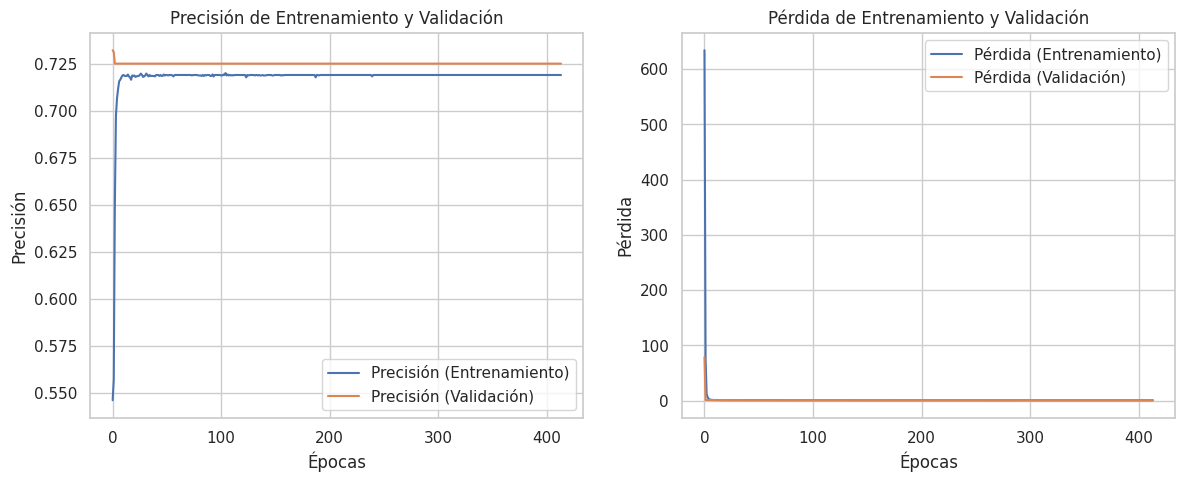

In [16]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)

model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, verbose=1)


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001, verbose=1)


history = model.fit(X_train.astype(np.float32), y_train_encoded,
                    epochs=500,
                    batch_size=64,
                    validation_split=0.2,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

test_loss, test_accuracy = model.evaluate(X_test.astype(np.float32), y_test_encoded)
print(f"\nPrecisión en el conjunto de prueba: {test_accuracy * 100:.2f}%")
print(f"Pérdida en el conjunto de prueba: {test_loss}")
print(f"Número de clases: {num_classes}")


acc = history.history.get('accuracy')
val_acc = history.history.get('val_accuracy')
loss = history.history.get('loss')
val_loss = history.history.get('val_loss')
epochs_range = range(len(acc if acc else val_acc if val_acc else loss if loss else val_loss))

plt.figure(figsize=(14, 5))

if acc and val_acc:
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Precisión (Entrenamiento)')
    plt.plot(epochs_range, val_acc, label='Precisión (Validación)')
    plt.legend(loc='lower right')
    plt.title('Precisión de Entrenamiento y Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')

if loss and val_loss:
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Pérdida (Entrenamiento)')
    plt.plot(epochs_range, val_loss, label='Pérdida (Validación)')
    plt.legend(loc='upper right')
    plt.title('Pérdida de Entrenamiento y Validación')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')

if not (acc and val_acc and loss and val_loss):
    if acc and val_acc:
         plt.title('Precisión de Entrenamiento y Validación')
         plt.xlabel('Épocas'); plt.ylabel('Precisión')
    elif loss and val_loss:
        plt.title('Pérdida de Entrenamiento y Validación')
        plt.xlabel('Épocas'); plt.ylabel('Pérdida')

plt.show()

Pérdida en el conjunto de prueba: 0.7504
Precisión en el conjunto de prueba: 0.7201
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Reporte de Clasificación:
              precision    recall  f1-score   support

        baja       0.00      0.00      0.00        86
       media       0.72      1.00      0.84       885
        alta       0.00      0.00      0.00       258

    accuracy                           0.72      1229
   macro avg       0.24      0.33      0.28      1229
weighted avg       0.52      0.72      0.60      1229



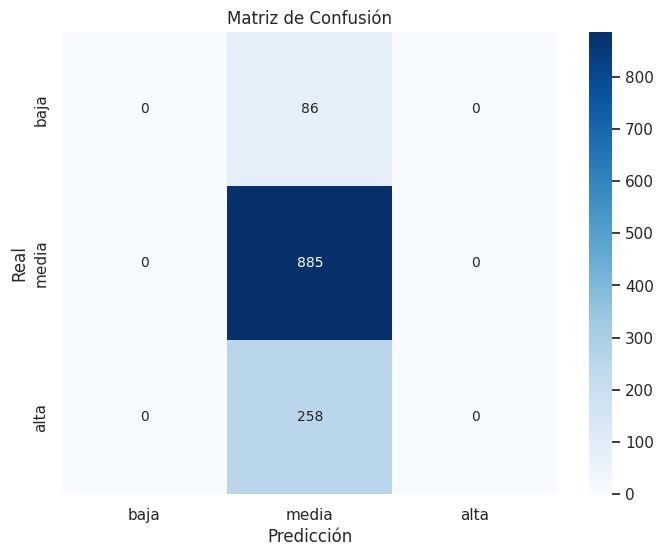

In [17]:
target_names = ['baja', 'media', 'alta']

X_test_np = X_test.astype(np.float32)

loss, accuracy = model.evaluate(X_test_np, y_test_encoded, verbose=0)
print(f"Pérdida en el conjunto de prueba: {loss:.4f}")
print(f"Precisión en el conjunto de prueba: {accuracy:.4f}")


y_pred_proba = model.predict(X_test_np)
y_pred_classes = np.argmax(y_pred_proba, axis=1)
y_true_classes = np.argmax(y_test_encoded, axis=1)


print("\nReporte de Clasificación:")
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names, zero_division=0))


cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()